<a href="https://colab.research.google.com/github/cuomo2236364-create/FDS-20252026/blob/main/fma_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# Loading all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import zipfile
import matplotlib.image as mpimg

import librosa
import librosa.display

In [3]:
# Cloning the GitHub repos of the "fma_small" dataset and the metadata
# [ !! It takes about 5 minutes !! ]

!wget https://os.unil.cloud.switch.ch/fma/fma_small.zip
!wget https://os.unil.cloud.switch.ch/fma/fma_metadata.zip

--2025-11-27 15:32:21--  https://os.unil.cloud.switch.ch/fma/fma_small.zip
Resolving os.unil.cloud.switch.ch (os.unil.cloud.switch.ch)... 86.119.28.16, 2001:620:5ca1:201::214
Connecting to os.unil.cloud.switch.ch (os.unil.cloud.switch.ch)|86.119.28.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7679594875 (7.2G) [application/zip]
Saving to: ‘fma_small.zip.1’

fma_small.zip.1     100%[===================>]   7.15G  24.9MB/s    in 5m 7s   

2025-11-27 15:37:29 (23.8 MB/s) - ‘fma_small.zip.1’ saved [7679594875/7679594875]

--2025-11-27 15:37:29--  https://os.unil.cloud.switch.ch/fma/fma_metadata.zip
Resolving os.unil.cloud.switch.ch (os.unil.cloud.switch.ch)... 86.119.28.16, 2001:620:5ca1:201::214
Connecting to os.unil.cloud.switch.ch (os.unil.cloud.switch.ch)|86.119.28.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 358412441 (342M) [application/zip]
Saving to: ‘fma_metadata.zip.1’

fma_metadata.zip.1  100%[===================>] 

In [37]:
# Unzipping the two folders previously loaded
# [ !! It takes about 15 minutes !! ]

for zip_path in ["fma_small.zip.1", "fma_metadata.zip.1"]:
    with zipfile.ZipFile(zip_path, "r") as z:
        z.extractall()

In [ ]:
AUDIO_DIR = "fma_small"
files = []

for root, dirs, filenames in os.walk(AUDIO_DIR):
    for f in filenames:
        if f.lower().endswith(".mp3"):
            files.append(os.path.join(root, f))

print(f"{len(files)} file MP3 trovati")
print(files[:5])


In [11]:
# Generating four tables (from the metadata) with information regarding the 8.000 audio tracks

tracks = pd.read_csv('fma_metadata/tracks.csv', index_col = 0, header = [0, 1])
genres = pd.read_csv('fma_metadata/genres.csv', index_col = 0)
features = pd.read_csv('fma_metadata/features.csv', index_col = 0, header = [0, 1, 2])
echonest = pd.read_csv('fma_metadata/echonest.csv', index_col = 0, header = [0, 1, 2])

# Printing their shape to check if they've been correctly generated

print("Tracks:", tracks.shape)
print("Genres:", genres.shape)
print("Features:", features.shape)
print("Echonest:", echonest.shape)

Tracks: (106574, 52)
Genres: (163, 4)
Features: (106574, 518)
Echonest: (13129, 249)


ChatGPT regarding the file *features.csv*:

"Sono feature pre-estratte dall’audio usando *librosa*, ma non sono spettrogrammi completi. Non sono dunque adatte per CNN: non sono matrici tempo-frequenza, quanto più valori aggregati."

In [20]:
import os
import librosa

audio_dir = "fma_small"
files = []

for root, dirs, filenames in os.walk(audio_dir):
    for f in filenames:
        if f.endswith(".mp3"):
            files.append(os.path.join(root, f))

print(f"----- {len(files)} audio tracks found -----")


----- 8000 audio tracks found -----


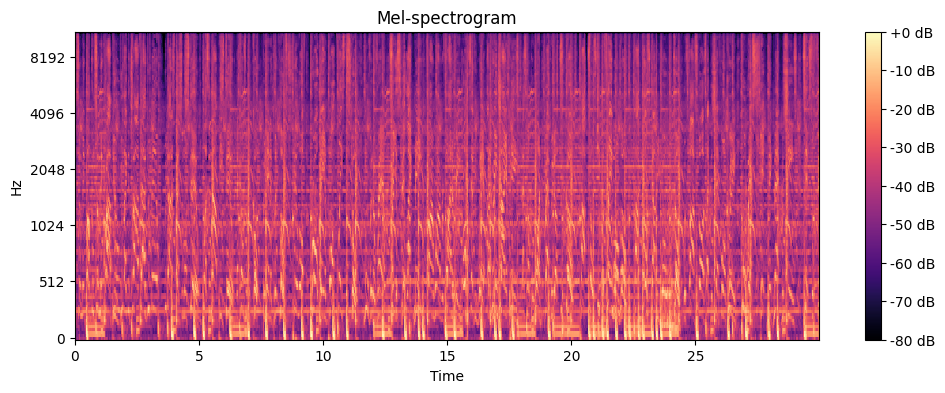

In [13]:
# Generating the Mel-spectrogram for the previously identified audio track

# y is a 1-D numpy array with the audio
y, sr = librosa.load(audio_path, sr = 22050)

S = librosa.feature.melspectrogram(
    y = y,
    sr = sr,
    n_fft = 2048,
    hop_length = 512,
    n_mels = 128
)

S_dB = librosa.power_to_db(S, ref = np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(S_dB, sr = sr, hop_length = 512, x_axis = 'time', y_axis = 'mel')
plt.colorbar(format = "%+2.f dB")
plt.title("Mel-spectrogram")
plt.show()

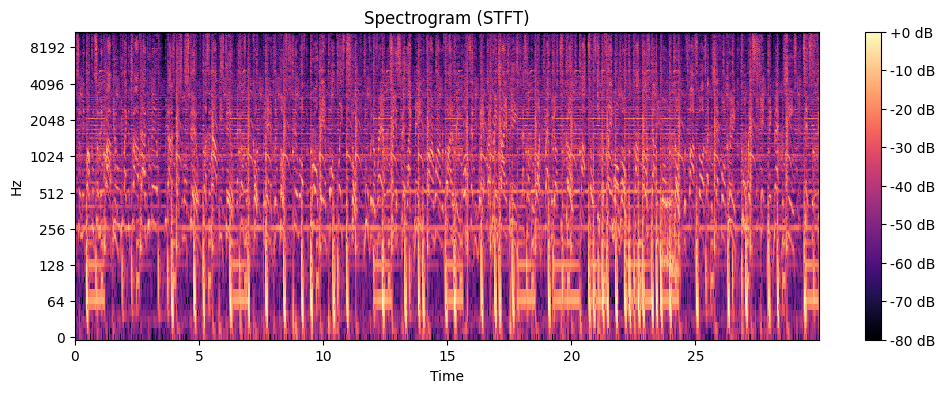

In [18]:
# Generating the Spectrogram (STFT, aka "Short-Time Fourier Transform") for the same audio track
# The reasoning is the same as the one seen in the previous cell of code, only the definition of the spectrogram changes
 # [In this regard, a more detailed research is needed]

D = librosa.stft(y, n_fft = 2048, hop_length = 512)
S_db = librosa.amplitude_to_db(np.abs(D), ref = np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(S_db, sr = sr, hop_length = 512, x_axis = 'time', y_axis = 'log')
plt.colorbar(format = "%+2.f dB")
plt.title("Spectrogram (STFT)")
plt.show()



In [19]:

# Collecting all the 8.000 audio tracks from the "fma_small" dataset

audio_dir = "fma_small"
files = []

for root, dirs, filenames in os.walk(audio_dir):
    for f in filenames:
        if f.endswith(".mp3"):
            files.append(os.path.join(root, f))

print(f"----- {len(files)} audio tracks found -----")

print("\nFirst 5 audio tracks:")

# Printing the first 5 audio tracks
for file in files[:5]:
    y, sr = librosa.load(file, sr = 22050)
    print("\n", file, "\nDuration (in seconds):", round(len(y)/sr, 2))

----- 8000 audio tracks found -----

First 5 audio tracks:

 fma_small/047/047074.mp3 
Duration (in seconds): 29.98

 fma_small/047/047198.mp3 
Duration (in seconds): 30.0

 fma_small/047/047200.mp3 
Duration (in seconds): 30.0

 fma_small/047/047506.mp3 
Duration (in seconds): 29.98

 fma_small/047/047868.mp3 
Duration (in seconds): 29.98


In [40]:
from google.colab import files

# Carica il file ZIP dal tuo computer
uploaded = files.upload()


Saving fma_spectrograms.zip to fma_spectrograms.zip


In [46]:
import zipfile
import os

# Cartella dove vogliamo estrarre le immagini
OUTPUT_DIR = "fma_spectrograms_clean"
os.makedirs(OUTPUT_DIR, exist_ok=True)

with zipfile.ZipFile("fma_spectrograms.zip", "r") as zip_ref:
    # ZIP potrebbe contenere una cartella interna
    for member in zip_ref.namelist():
        # Rimuove eventuale cartella interna (solo il nome del file)
        filename = os.path.basename(member)
        if filename:  # evita le cartelle vuote
            # Scrive direttamente nella nostra cartella OUTPUT_DIR
            source = zip_ref.open(member)
            target_path = os.path.join(OUTPUT_DIR, filename)
            with open(target_path, "wb") as target:
                with source as src:
                    target.write(src.read())

# Controllo
print("Prime immagini estratte:", os.listdir(OUTPUT_DIR)[:5])


Prime immagini estratte: ['142079_Electronic.png', '120504_Instrumental.png', '117170_Instrumental.png', '71250_Hip-Hop.png', '44780_Experimental.png']


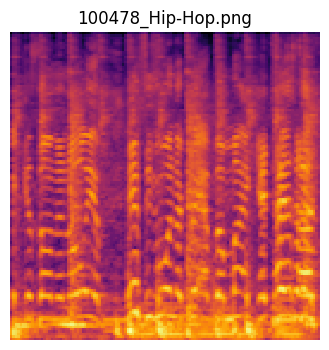

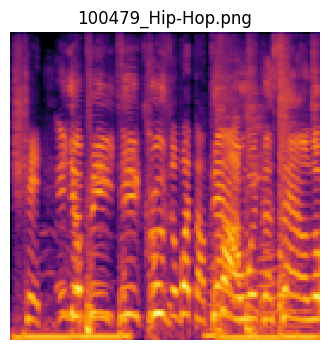

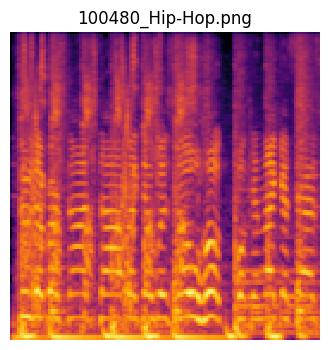

In [50]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_files = sorted(os.listdir(OUTPUT_DIR))[:3]  # prime 3 immagini

for img_file in img_files:
    img_path = os.path.join(OUTPUT_DIR, img_file)
    img = mpimg.imread(img_path)

    plt.figure(figsize=(12, 4))
    plt.imshow(img)
    plt.axis('off')
    plt.title(img_file)
    plt.show()



In [77]:
#Folder Organization
spectrogram_dir = "fma_spectrograms_clean"
dataset_dir = "dataset"
os.makedirs(dataset_dir, exist_ok=True)

# Carico metadata
tracks = pd.read_csv("fma_metadata/tracks.csv", index_col=0, header=[0,1])

copied = 0
skipped = 0

for fname in os.listdir(spectrogram_dir):
    if not fname.lower().endswith(".png"):
        continue

    # Estrae solo la parte numerica prima del _
    track_id_str = fname.split("_")[0]

    try:
        track_id = int(track_id_str)
    except:
        skipped += 1
        continue

    if track_id not in tracks.index:
        skipped += 1
        continue

    genre = tracks.loc[track_id, ('track','genre_top')]
    genre_dir = os.path.join(dataset_dir, genre)
    os.makedirs(genre_dir, exist_ok=True)

    shutil.copy(os.path.join(spectrogram_dir, fname), os.path.join(genre_dir, fname))
    copied += 1

print(f"✅ Copiati {copied} file nelle cartelle dei generi")
print(f"⚠️ Saltati {skipped} file senza corrispondenza")




✅ Copiati 7997 file nelle cartelle dei generi
⚠️ Saltati 0 file senza corrispondenza


In [78]:
#Check if the file are distrbituited correctly
for genre in sorted(os.listdir(dataset_dir)):
    genre_path = os.path.join(dataset_dir, genre)
    if os.path.isdir(genre_path):
        files = os.listdir(genre_path)[:5]
        print(f"{genre}: {files}")


Electronic: ['142079_Electronic.png', '139934_Electronic.png', '42374_Electronic.png', '45103_Electronic.png', '133027_Electronic.png']
Experimental: ['44780_Experimental.png', '66482_Experimental.png', '68872_Experimental.png', '64078_Experimental.png', '69303_Experimental.png']
Folk: ['47865_Folk.png', '129439_Folk.png', '12488_Folk.png', '81033_Folk.png', '49030_Folk.png']
Hip-Hop: ['71250_Hip-Hop.png', '43861_Hip-Hop.png', '108846_Hip-Hop.png', '17491_Hip-Hop.png', '142362_Hip-Hop.png']
Instrumental: ['120504_Instrumental.png', '117170_Instrumental.png', '54149_Instrumental.png', '45388_Instrumental.png', '126588_Instrumental.png']
International: ['62191_International.png', '152418_International.png', '60037_International.png', '38780_International.png', '108868_International.png']
Pop: ['126403_Pop.png', '149099_Pop.png', '41568_Pop.png', '66648_Pop.png', '55293_Pop.png']
Rock: ['10675_Rock.png', '110167_Rock.png', '26639_Rock.png', '255_Rock.png', '14741_Rock.png']


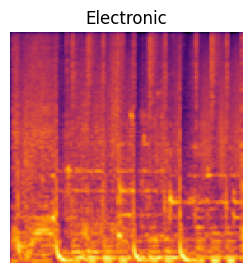

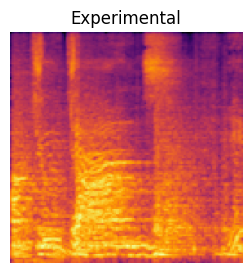

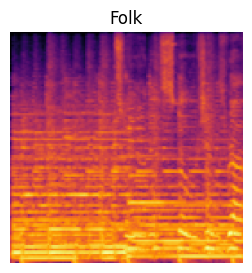

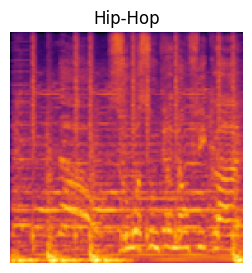

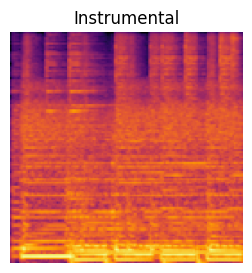

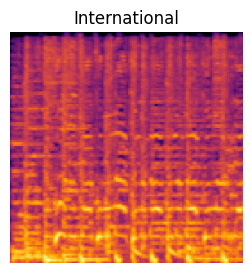

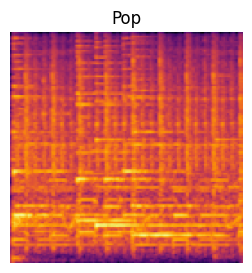

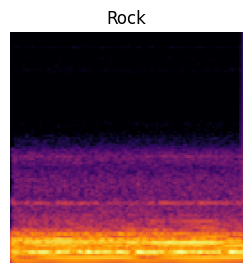

In [79]:
#Visualization of one image per genre
for genre in sorted(os.listdir(dataset_dir)):
    genre_path = os.path.join(dataset_dir, genre)
    if os.path.isdir(genre_path):
        files = os.listdir(genre_path)
        if files:
            img_path = os.path.join(genre_path, files[0])
            img = mpimg.imread(img_path)
            plt.figure(figsize=(6,3))
            plt.imshow(img)
            plt.axis('off')
            plt.title(genre)
            plt.show()


We can clearly see that all  the spectrograms, besides the one for the "Rock" genre, are quite similar.
The spectrogram rapresenting a "Rock" song is clearly not as noisy as the spetrogram rapresenting all the other genres

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

dataset_dir = "dataset"

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

train_dataset = datasets.ImageFolder(root=dataset_dir, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Controllo
print("Classi trovate:", train_dataset.classes)
print("Numero immagini totali:", len(train_dataset))
